In [ ]:
#pip install git+https://github.com/ITMO-NSS-team/EPDE@spectral_methods (опционально)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from epde.interface.prepared_tokens import CustomTokens, TrigonometricTokens, CacheStoredTokens
from epde.evaluators import CustomEvaluator
import epde.interface.interface as epde_alg

In [2]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.utilities import lambdify
from sympy.abc import x

In [4]:
from sympy.abc import x
# f = Function('f')
# F = dsolve(Derivative(f(x), x, x) + 0.25*Derivative(f(x), x) + 3*f(x), f(x), ics = {f(0): 1, f(x).diff(x).subs(x, 0): 0})
# F

In [2]:
from sympy import *
from sympy.abc import x

In [3]:
f = lambdify(x, (0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x))
df = ((0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x)).diff(x)
df2 = df.diff(x)
df = lambdify(x, df)
df2 = lambdify(x, df2)
df2

<function _lambdifygenerated(x)>

In [4]:
f = np.vectorize(f)
df = np.vectorize(df)
df2 = np.vectorize(df2)

In [4]:
from epde.preprocessing.deriv_calculators import SpectralDeriv, PolynomialDeriv

In [6]:
def fitness_value_extractor_1d(history):
    """Выделяет значения функции приспособленности из каждого поколения сохраненной истории
    поколений для диффуров с одной независимой переменной"""
    clear_hiss = []
    for i in history:
        if i == []:
            continue
        else:
            clear_hiss.append(i)
    hist = []
    eq_hist = []
    for i in clear_hiss:
        eq_hist=np.array([])
        for j in i:
            x = [u.value for u in j.vals.chromosome.values()][:1]
            x = np.array([u.fitness_value for u in x])
            eq_hist = np.append(eq_hist, x)
        hist.append(np.amin(eq_hist))  
    return np.array(hist).T

In [5]:
sd = SpectralDeriv()

In [6]:
x = np.linspace(0, 10, 1000)
func = f(x)
dfunc = df(x)
df2unc = df2(x)

In [27]:
pd = PolynomialDeriv()

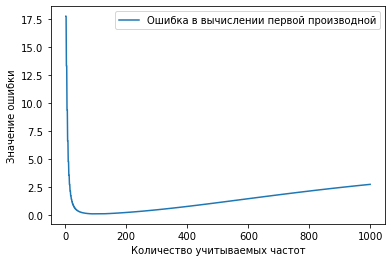

In [22]:
#Данные для ОДУ

plt.plot(np.arange(1,1000), err_1, label = "Ошибка в вычислении первой производной")
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

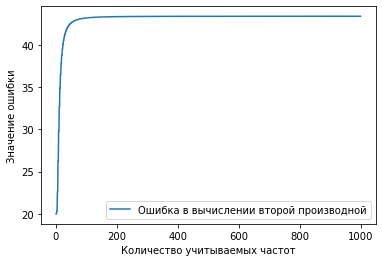

In [23]:
#Данные для ОДУ

plt.plot(np.arange(1,1000), err_2, label = "Ошибка в вычислении второй производной")
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

In [2]:
import epde.interface.interface as epde_alg
from epde.interface.prepared_tokens import TrigonometricTokens

In [1]:
def fitness_value_extractor(history):
    
        """Выделяет значения функции приспособленности из каждого поколения сохраненной истории
    поколений для диффуров с несколькими независимыми переменными"""
        
    clear_hiss = []
    for i in history:
        if i == []:
            continue
        else:
            clear_hiss.append(i)
    hist = []
    eq_hist = []
    for i in clear_hiss:
        eq_hist=np.array([])
        for j in i:
            x = [u.value for u in j.vals.chromosome.values()][:2]
            x = np.array([u.fitness_value for u in x])
            eq_hist = np.append(eq_hist, x)
        hist.append(eq_hist.reshape((eq_hist.size//2,2)))
    for i in hist:
        if len(i.shape) == 1:
            continue
        else:
            i = i.T
            i[0] = np.amin(i[0])
            i[1] = np.amin(i[1])    
    for i in range(len(hist)):
        hist[i] = hist[i][0]
    return np.array(hist).T

In [15]:
#OДУ

%%time
t = np.linspace(0,10,1000)
v = f(t)#+np.random.normal(0, 0.01, t.size)
hiss = []
one_stage_hiss = []
for i in range(10,40,5):
    one_stage_hiss = []
    minn = np.array([])
    print(str(i)*10)
    for j in range(10):
        print(str(j)*50)
        epde_search_obj3 = epde_alg.epde_search(use_solver = False, dimensionality = 0, boundary = 100 ,coordinate_tensors = [t,],
                                                verbose_params = {'show_moeadd_epochs' : False})
        custom_grid_tokens = CacheStoredTokens(token_type = 'grid',
                                        token_labels = ['t'],
                                        token_tensors = {'t' : t},
                                        params_ranges = {'power' : (1, 1)},
                                        params_equality_ranges = None)
        trig_tokens = TrigonometricTokens(dimensionality = 0)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}
        epde_search_obj3.set_moeadd_params(population_size=4, training_epochs = 15)
        epde_search_obj3.set_preprocessor(default_preprocessor_type='spectral', preprocessor_kwargs={'n':i})
        epde_search_obj3.fit(data = v, max_deriv_order=2,  equation_terms_max_number = 4, equation_factors_max_number = factors_max_number,coordinate_tensors = [t,],
                            eq_sparsity_interval = (1e-8, 1),additional_tokens = [trig_tokens, custom_grid_tokens])
#         epde_search_obj3.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj3.optimizer.history)
    for k in one_stage_hiss:
        print(type(fitness_value_extractor_1d(k)))
        print(fitness_value_extractor_1d(k))
        if set(fitness_value_extractor_1d(k)) == set():
            continue
        minn = np.append(minn, np.amin(fitness_value_extractor_1d(k)))
    hiss.append(minn)

10101010101010101010
00000000000000000000000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3F641EE0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3F641EE0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
(1000,)
derivatives orders are [0, 0]
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [4.95925223e-06]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [4.68427459e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [4.66471573e-06]
New solutio

The optimization has been conducted.
77777777777777777777777777777777777777777777777777
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D6ED280>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D6ED280>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
(1000,)
derivatives orders are [0, 0]
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00051326]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.42798337e-07]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00064723]
New

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [3.84838694e-06]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [2.13955411e-06]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [3.7956261e-07]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [0.1382846]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
44444444444444444444444444444444444444444444444444
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3F4E0070>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3F4E0070>
trig_token_params : VALUES = (0, 0)
Deriv orde

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00161744]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [8.5821803e-07]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [5.96032539e-07]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [1.09326812e-06]
New solution accepted, confirmed 4/4 solutions.
[1.0, 0.0] [[1.0, 0.0]]
best_obj 2
The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3E121C40>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3E121C40>
trig_token_params : V

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [6.18927381e-08]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.18183045e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [6.65397627e-08]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [7.89912434e-05]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
88888888888888888888888888888888888888888888888888
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3DD42D30>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3DD42D30>
trig_token_params : VALUES = (0, 0)
Deri

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.65631027]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.1012659]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00057489]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [3.55829559e-05]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
44444444444444444444444444444444444444444444444444
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D555CA0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D555CA0>
trig_token_params : VALUES = (0, 0)
Deriv orders afte

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00022292]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00045642]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.10164982]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [7.89393228e-07]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D84CA90>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D84CA90>
trig_token_params : VALUES = (0, 0)
Deriv orders aft

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00054251]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.99015394e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [3.77960564e-08]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [1.3412705e-06]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
88888888888888888888888888888888888888888888888888
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D511580>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3D511580>
trig_token_params : VALUES = (0, 0)
Deriv ord

The optimization has been conducted.
33333333333333333333333333333333333333333333333333
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3E677DC0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000022B3E677DC0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
(1000,)
derivatives orders are [0, 0]
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [8.71647729e-06]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00400246]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [1.85439074e-07]

The optimization has been conducted.
<class 'numpy.ndarray'>
[0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246]
<class 'numpy.ndarray'>
[0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246]
<class 'numpy.ndarray'>
[26.7945569   5.80590559]
<class 'numpy.ndarray'>
[0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246]
<class 'numpy.ndarray'>
[0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246]
<class 'numpy.ndarray'>
[0.00836246 0.00836246 0.00836246 0.00836246 0.00836246 0.00836246
 0.00836246 0.00836246 0.00836246 0.00836246 0.008

In [18]:
hiss
# plt.boxplot(hiss)

[array([0.65039832, 0.65039832, 0.65039832, 0.65039832, 0.65039832,
        0.65039832]),
 array([0.47359609, 0.47359609, 0.47359609, 0.47359609, 0.47359609,
        0.47359609, 0.47359609, 0.47359609, 0.47359609]),
 array([0.18083796, 0.18083796, 0.18083796, 0.18083796, 0.18083796,
        0.18083796, 0.18083796, 0.18083796]),
 array([0.0813121, 0.0813121, 0.0813121, 0.0813121, 0.0813121, 0.0813121,
        0.0813121]),
 array([0.02148325, 0.02148325, 0.02148325, 0.02148325, 0.02148325,
        0.02148325, 0.02148325, 0.02148325, 0.02148325, 0.02148325]),
 array([0.00836246, 0.00836246, 5.80590559, 0.00836246, 0.00836246,
        0.00836246, 0.00836246, 0.00836246, 0.00836246])]

In [104]:
hiss = np.array(hiss)
hiss

array([array([0.00749357, 0.00749357, 0.00749357, 0.00749357, 0.00749357,
              0.00749357, 0.00749357, 0.00749357, 0.00749357, 0.00749357]),
       array([5.95107056, 0.02998954, 0.02998954, 0.02998954, 0.02998954,
              0.02998954, 5.95107056, 0.02998954, 0.02998954])           ,
       array([0.06864838, 0.06864838, 4.92953783, 0.06864838, 0.06864838,
              0.06864838, 0.06864838, 0.06864838, 5.95487251])           ,
       array([0.12445057, 0.12445057, 0.12445057, 0.12445057, 8.87360758,
              0.12445057, 0.12445057, 0.12445057, 0.12445057])           ,
       array([0.19159593, 0.19159593, 5.96533778, 0.76683961, 0.76683961,
              0.19159593, 0.19159593, 0.19159593, 0.19159593])           ,
       array([ 0.25712379,  7.96959445,  0.25712379,  0.25712379,  0.25712379,
              10.72154287])                                                   ,
       array([0.30782422, 0.30782422, 0.30782422, 0.30782422, 0.30782422,
              0.30782

In [105]:
np.save('ode_fitness.npy', hiss)

{'whiskers': [<matplotlib.lines.Line2D at 0x28552ed03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x28552ed0bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x285530de0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x28552ea08e0>,
 'fliers': [],
 'means': []}

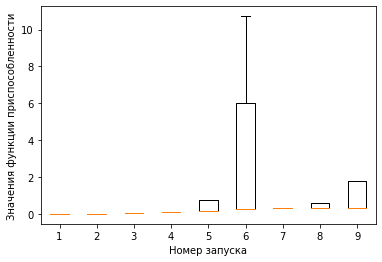

In [26]:
old_hiss = np.load('ode_fitness.npy',allow_pickle=True)
plt.ylabel("Значения функции приспособленности")
plt.xlabel('Номер запуска')
plt.boxplot(old_hiss, showfliers = False)

In [4]:
#Система ДУ

%%time
spectral_system_hiss = []    
t = np.load('t.npy')
data = np.load('data.npy')
x = data[:, 0]; y = data[:, 1]
    # x += np.random.normal(0, err_factor*np.min(x), size = x.size)
    # y += np.random.normal(0, err_factor*np.min(y), size = y.size) 
dimensionality = x.ndim - 1
popsize = 7
hiss = []
for i in range(50,1000,100):
    one_stage_hiss = []
    minn = np.array([])
    print(str(i)*10)
    for j in range(10):
        print(str(j)*30)
        epde_search_obj = epde_alg.epde_search(use_solver = False, dimensionality = dimensionality, boundary = 10,
                                                                       coordinate_tensors = [t,], verbose_params = {'show_moeadd_epochs' : True})    
        epde_search_obj.set_preprocessor(default_preprocessor_type='spectral',
                                                                 preprocessor_kwargs={'n':i})
        epde_search_obj.set_moeadd_params(population_size = popsize, training_epochs=25)
        trig_tokens = TrigonometricTokens(dimensionality = dimensionality)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}

        epde_search_obj.fit(data=[x, y], variable_names=['u', 'v'], max_deriv_order=(1,),
                                                    equation_terms_max_number=3, data_fun_pow = 1, additional_tokens=[trig_tokens,], 
                                                    equation_factors_max_number=factors_max_number,
                                                    eq_sparsity_interval=(1e-10, 1e-4), coordinate_tensors=[t, ])
        epde_search_obj.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj.optimizer.history)
    for k in one_stage_hiss:
        print(np.amin(fitness_value_extractor(k)[0]))
        print(np.amin(fitness_value_extractor(k)[1]))
        minn = np.append(minn, [np.amin(fitness_value_extractor(k)[0]),np.amin(fitness_value_extractor(k)[1])])
    hiss.append(minn)

50505050505050505050
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE2C50F760>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE2C50F760>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.85700671e-05 3.58159274e-09]
New solution accepted, 

Multiobjective optimization : 22-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.19193363090378732 * dv/dx1{power: 1.0} + -1

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.29126030e-06 1.83374926e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.99059833e-06 2.69723807e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.59907306e-05 1.58816393e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.28725108e-10 1.90564229e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [6.55325339e-08 3.55605982e-08]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.19193363090378732 * dv/dx1{power: 1.0} + -1.0815611915708006 * v{power: 1.0} + 0.32417391472433155 = du/dx1{power: 1.0}
 \ 0.24307661272741707 * u{power: 1.0} + -0.04718607876231337 * du/dx1{power: 1.0} + -0.24286465549606936 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0003466824543492134}, ('sparsity',

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.54531034e-09 9.63435907e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.11555208e-06 1.06923184e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.95917065e-06 1.96040746e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.31699923e-10 1.82940437e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.32025019e-09 1.60483672e-07]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.0856802531795917 * u{power: 1.0} * v{power: 1.0} + 1.269921160155158 * dv/dx1{power: 1.0} + 0.325477205410579 = du/dx1{power: 1.0}
 \ 0.24307475212775978 * u{power: 1.0} + 0.0 * dv/dx1{power: 1.0} * sin{power: 1.0, freq: 5.80900730844005, dim: 0.0} + -0.24292167398147482 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True,

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.04289897e-08 3.92207435e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.08741615e-06 1.43699309e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.88384127e-10 1.69270475e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.63741019e-08 1.97896687e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [9.62626479e-07 5.57057898e-10]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6636182477005823 * v{power: 1.0} + 0.34358503964228193 * u{power: 1.0} * du/dx1{power: 1.0} + 0.19900207038967208 = du/dx1{power: 1.0}
 \ 0.24307661272741707 * u{power: 1.0} + -0.04718607876231337 * du/dx1{power: 1.0} + -0.24286465549606936 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 6.464894969405508e-05

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.14998086e-07 2.39216479e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.18452739e-09 8.72350191e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.32306842e-05 4.07650767e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.87835322e-08 1.63804660e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.74389051e-07 1.08863170e-07]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4132018278063104 * dv/dx1{power: 1.0} + -1.2941941573981068 * v{power: 1.0} + 0.38783985029701473 = du/dx1{power: 1.0}
 \ -0.10940774927846161 * u{power: 1.0} + 0.8241848583524957 * dv/dx1{power: 1.0} + 0.10940343801522634 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00019476409999063973}

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.31857959e-09 4.14648732e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.3904873e-09 5.5875699e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.37160036e-09 1.56936158e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.31615819e-08 5.50195862e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.73733493e-10 4.15398885e-08]
New solution accept

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.2941941573981066 * v{power: 1.0} + -0.413201827806311 * dv/dx1{power: 1.0} + 0.3878398502970148 = du/dx1{power: 1.0}
 \ -0.11406869437801727 * du/dx1{power: 1.0} + 0.2908293441058815 * u{power: 1.0} + -0.2905038088824004 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.000178567585027567}, ('sparsity', 'v'): {'optimizable': True, 'value': 6.82

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.86460157e-06 4.11309638e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.21225513e-08 6.41464716e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.13625533e-10 5.00800124e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.21630163e-06 1.34539409e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [7.59594809e-09 3.50972899e-06]
New solution acce

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.38217719711509773 * u{power: 1.0} + -1.2733631559777543 * u{power: 1.0} * v{power: 1.0} + -7.291302067891081e-05 = du/dx1{power: 1.0}
 \ -0.9405405607613601 * v{power: 1.0} + 0.9398145965234832 * v{power: 1.0} * u{power: 1.0} + 0.0001474410250136282 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8,

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.64520318e-09 2.81035403e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.80599066e-06 1.17856991e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.33951414e-08 6.75406497e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.86014168e-08 7.82255746e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.65813630e-05 4.73753028e-06]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.7005441790540106 * v{power: 1.0} + 0.636689586368421 * du/dx1{power: 1.0} + -0.23481113573153795 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.8204602239585989 * dv/dx1{power: 1.0} + -0.107727873413159 * u{power: 1.0} + 0.10772606867231883 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0001

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.26107822e-07 3.01166900e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.43282616e-05 1.39150701e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.34620036e-05 1.71185176e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.55773957e-05 1.17604481e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.24360328e-10 2.98166482e-09]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.41147164375550727 * du/dx1{power: 1.0} * u{power: 1.0} + -0.6623544669720844 * v{power: 1.0} + 0.19871678111071384 = du/dx1{power: 1.0}
 \ -0.12569997616420045 * du/dx1{power: 1.0} + 0.29635448133500275 * u{power: 1.0} + -0.29599926437747215 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 3.570124955217558e-05

Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
D

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.79043310e-09 2.43945308e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.31554939e-05 2.85263828e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.35916932e-07 5.18942443e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.54113073e-10 5.68745617e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.37787463e-06 2.89608145e-07]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.39332315083552644 * u{power: 1.0} + -1.31051858364118 * u{power: 1.0} * v{power: 1.0} + -0.0001001031450142964 = du/dx1{power: 1.0}
 \ -0.9775695174521306 * v{power: 1.0} + 0.9768155927721278 * v{power: 1.0} * u{power: 1.0} + 0.00017078283620841628 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimiz

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

1.7558680919564549
0.9004469129841574
0.21713938505052421
0.13813298061767262
0.21713938505052438
0.13813298061767262
0.8692494385214229
0.13813298061767262
0.21713938505052438
0.7716847099371026
350350350350350350350350350350
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE39686A30>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE39686A30>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 22-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
Duri

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.83433264e-09 3.57880576e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.58760081e-05 1.02813155e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.84142131e-09 4.26052911e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.93576453e-09 1.02317842e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [6.07565264e-06 6.90855398e-05]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.14920486832046304 * du/dx1{power: 1.0} + -0.40788870439067204 * dv/dx1{power: 1.0} + -0.026205546380248954 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.2979629822126367 * u{power: 1.0} + -0.12942461121586235 * du/dx1{power: 1.0} + -0.2975971477359525 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 7.78880163

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.27579187e-06 1.11949516e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.13647008e-07 1.99252226e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.32722535e-10 2.22279569e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.30711657e-10 2.02872069e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [5.62254956e-08 1.65351232e-07]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4573781879614762 * dv/dx1{power: 1.0} + -1.32597445158207 * v{power: 1.0} + 0.3973221229776218 = du/dx1{power: 1.0}
 \ 0.2979629822126367 * u{power: 1.0} + -0.12942461121586235 * du/dx1{power: 1.0} + -0.2975971477359525 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.000139715029212609}, ('sparsity', 'v'): 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE3D4DDE80>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE3D4DDE80>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.05321388e-09 2.43434086e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, spar

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.321704099728605 * v{power: 1.0} * u{power: 1.0} + 0.3966766767389951 * u{power: 1.0} + -0.00010996818104672124 = du/dx1{po

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.90744378e-08 1.45911735e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.68091155e-10 1.25202077e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.48813795e-06 4.95286726e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [9.85857762e-06 1.03354057e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.78307929e-06 5.67420033e-08]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6575987741210074 * v{power: 1.0} + 0.41577278506921667 * u{power: 1.0} * du/dx1{power: 1.0} + 0.19729026425502566 = du/dx1{power: 1.0}
 \ 0.570318626020375 * dv/dx1{power: 1.0} + -0.033018371888090634 * du/dx1{power: 1.0} + 0.0001669551787950148 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.80768247e-08 1.14283203e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.19595681e-08 3.65649232e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.18519088e-07 6.06026863e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.08884190e-09 1.22069401e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [9.23681005e-10 1.56048005e-08]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6575987741210074 * v{power: 1.0} + 0.41577278506921667 * u{power: 1.0} * du/dx1{power: 1.0} + 0.19729026425502566 = du/dx1{power: 1.0}
 \ -0.0009596056250094717 * v{power: 1.0} + 0.29862636066493786 * u{power: 1.0} + -0.29817385518537004 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00013942124273635232},

Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.98739849e-06 2.70239049e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [7.67391038e-10 7.59734546e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.73624631e-10 1.62718696e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.21757455e-10 1.02838798e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [7.14552711e-08 1.77699528e-07]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.17580313440659381 * u{power: 1.0} + -0.8655911686358957 * dv/dx1{power: 1.0} + -0.2021236025201828 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.10702871524932855 * u{power: 1.0} + 0.8193417114604695 * dv/dx1{power: 1.0} + 0.10702684067164592 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.

During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
D

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.47126192e-08 5.61536795e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.81755539e-05 3.55621743e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.55975037e-06 1.19116392e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.37754648e-10 3.42894539e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.28680725e-09 7.15756273e-10]
New solution acce

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.3288840042654175 * u{power: 1.0} * v{power: 1.0} + 0.3988274107793045 * u{power: 1.0} + -0.00011776166441276881 = du/dx1{power: 1.0}
 \ 0.5864937948154442 * dv/dx1{power: 1.0} + 0.0002847773392667767 * v{power: 1.0} + 3.8559508557586256e-05 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.55538449e-08 5.11646205e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [7.69779871e-07 3.46728127e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.54822717e-10 7.76124647e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.07164404e-09 1.12117787e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [6.59869915e-10 2.46009386e-06]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.41649693979719604 * du/dx1{power: 1.0} * u{power: 1.0} + -0.6567298701100039 * v{power: 1.0} + 0.197028902877086 = du/dx1{power: 1.0}
 \ 0.14374917397110074 * u{power: 1.0} + 1.1248557006254147 * v{power: 1.0} * dv/dx1{power: 1.0} + -0.1437335009751033 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00012427

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.29434959e-09 1.60892317e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.35535686e-06 3.26051999e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.81205368e-09 4.53995254e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.06286993e-10 9.69441587e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [4.51171131e-10 2.90281156e-09]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.464535831768675 * dv/dx1{power: 1.0} + -1.3305139421441394 * v{power: 1.0} + 0.39867231574383644 = du/dx1{power: 1.0}
 \ -0.1068679974030504 * u{power: 1.0} + 0.8190112671256016 * dv/dx1{power: 1.0} + 0.10686581633040504 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00021368300443866023}, ('sparsity', 'v'): {'optimizable': T

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.02957300e-05 2.28987826e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.67931605e-07 3.03433880e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.90988244e-07 6.95346635e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.66039980e-09 2.77199399e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [7.02401990e-07 8.44553086e-07]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.3314016030792184 * v{power: 1.0} + -0.46616470522204945 * dv/dx1{power: 1.0} + 0.39893518293278174 = du/dx1{power: 1.0}
 \ -0.10672223871427498 * u{power: 1.0} + 0.8186456237321635 * dv/dx1{power: 1.0} + 0.10671972148518039 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 2.3680716072951426e-05}, ('sparsity', 'v'): {'optimizable'

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
Duri

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.59344826e-10 4.56226740e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.76659305e-06 7.15707735e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.3241675e-08 9.5730091e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.12721310e-05 5.72283973e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [5.44788658e-05 8.40530773e-10]
New solution accept

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.3314016030792184 * v{power: 1.0} + -0.46616470522204945 * dv/dx1{power: 1.0} + 0.39893518293278174 = du/dx1{power: 1.0}
 \ -0.1325237541243585 * du/dx1{power: 1.0} + 0.29918104293036063 * u{power: 1.0} + -0.2988046343136333 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00014451220552278243}, ('sparsity', 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.92897862e-05 1.38135507e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.17701813e-10 8.31518473e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.77529388e-09 9.26445484e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.38846220e-06 7.85670972e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [8.74670503e-06 1.66061154e-08]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.650369616172958 * du/dx1{power: 1.0} + 0.716854460908975 * v{power: 1.0} + -0.24182881332184972 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.9968855754392216 * v{power: 1.0} * u{power: 1.0} + -0.9976462827226068 * v{power: 1.0} + 0.00018704810953040774 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 4.690344626424902e-06}, ('sparsity', 'v'): {

Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.74601403e-06 1.22432307e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.25814950e-05 7.43491651e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.37197432e-06 4.89638318e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.54270816e-10 6.51966808e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [6.78596150e-08 8.80657339e-10]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.3314016030792184 * v{power: 1.0} + -0.46616470522204945 * dv/dx1{power: 1.0} + 0.39893518293278174 = du/dx1{power: 1.0}
 \ 0.2991698371137389 * u{power: 1.0} + 0.0 * du/dx1{power: 1.0} * sin{power: 1.0, freq: 6.049516646400807, dim: 0.0} + -0.29900028926405575 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0

Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Du

self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.21635902e-10 4.43656914e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.41434176e-10 2.94118457e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.87692514e-10 2.96129664e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.94275937e-10 1.25123662e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [3.01809970e-08 1.01288271e-08]
New solution accepted, confirmed 5/7 solutions.
Creating new equation, sparsity value [8.89799884e-10 1.11414079e-08]
New solution accepted, confirmed 6/7 solutions.
Creating new equation, sparsity value [1.52621478e-05 2.90481258e-07]
New solution accepted, confirmed 7/7 so

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -1.3319608255525675 * v{power: 1.0} + -0.46735423262142817 * dv/dx1{power: 1.0} + 0.3991001441228803 = du/dx1{power: 1.0}
 \ 0.8182349898112387 * dv/dx1{power: 1.0} + -0.10657637115974401 * u{power: 1.0} + 0.10657352266830232 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 2.390105673509354e-06}, ('sparsity', 'v'): {'optimizable': True, 'value': 0.00020609753213049573}} , with objective function values of [3.53333359 0.78402938 3.         4.        ] 

 / -1.3311830663253506 * v{power: 1.0} * u{power: 1.0} + 0.3995143932947986 * u{power: 1.0} + -0.00

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobje

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.13101780e-09 1.11962996e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [7.08319785e-07 2.15771513e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.13698710e-06 1.25364211e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.24535578e-08 6.39919208e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.73799390e-07 5.42454193e-06]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.14923161083937647 * v{power: 1.0} + -0.08363556640461457 * u{power: 1.0} + 0.10115815057987089 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.9985528642397496 * v{power: 1.0} + 0.997793142459363 * v{power: 1.0} * u{power: 1.0} + 0.0001883235128551375 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00031458154636714703}, ('sparsity', 'v'): {'

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.88351836e-09 1.29861114e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.32205587e-10 9.35091176e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.44998711e-09 4.27295051e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.27949726e-07 2.15003679e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.92901504e-07 2.80226310e-06]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0 * u{power: 1.0} + 0.641611144658649 * du/dx1{power: 1.0} * u{power: 1.0} + 0.0005387422253003534 = du/dx1{power: 1.0}
 \ 0.5872869031909534 * dv/dx1{power: 1.0} + 0.0 * v{power: 1.0} + 0.0001236208790496578 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00021992643368351234}, ('sparsity', 

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.34083005e-07 1.49991587e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.11006190e-06 2.49277944e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.57106571e-09 3.36590768e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.12541757e-07 1.37015789e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [2.48655272e-10 2.50646839e-05]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.3996917332409419 * u{power: 1.0} + -1.3317782459176324 * u{power: 1.0} * v{power: 1.0} + -0.00012288330929099978 = du/dx1{power: 1.0}
 \ -0.9991597521825835 * v{power: 1.0} + 0.9984011096832662 * v{power: 1.0} * u{power: 1.0} + 0.00018935379381912476 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 5.011140707211592e-05}, ('sparsity', 'v'): {'opt

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.80904940e-05 4.84747039e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.38156345e-08 3.04570042e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.32279853e-10 1.41554704e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.93487991e-05 3.65103631e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [5.36937394e-05 4.95247909e-09]
New solution acce

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4158772167283318 * dv/dx1{power: 1.0} + 0.15298663201914492 * du/dx1{power: 1.0} + -0.02740122519819754 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.8177896371662585 * dv/dx1{power: 1.0} + -0.1064277180517852 * u{power: 1.0} + 0.10642456029190417 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 9.695004583055918e-05}, ('sparsit

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.63044368e-08 1.72455060e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.88237581e-05 2.92389116e-09]
Creating new equation, sparsity value [4.86691148e-05 1.40465254e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.00505511e-05 4.88983054e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.14205013e-09 4.41936449e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equa

Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.6494338559541467 * du/dx1{power: 1.0} + 0.715456735653546 * v{power: 1.0} + -0.24162573275630558 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.5874402390834774 * dv/dx1{power: 1.0} + 0.0 * v{power: 1.0} + 0.00012352358340874162 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During M

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.29036695e-10 1.11360432e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.11161131e-08 1.77768570e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.88577096e-05 3.35524623e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.28907766e-10 1.38581014e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [1.96836574e-06 1.70397394e-09]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.46830394721211366 * dv/dx1{power: 1.0} + -1.3323358456096643 * v{power: 1.0} + 0.3992102568855489 = du/dx1{power: 1.0}
 \ 0.2993906581153497 * u{power: 1.0} + -0.1332375383172439 * du/dx1{power: 1.0} + -0.29901097472294097 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 1.1799477488878569e-06}, ('sparsity', '

Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Du

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.32263633e-05 2.41650621e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.07093980e-07 9.03221966e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.22444099e-06 1.52625254e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [9.30753570e-05 1.07141749e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [8.17296602e-05 2.00786210e-05]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.3998159898658954 * u{power: 1.0} + -1.3321961176222321 * u{power: 1.0} * v{power: 1.0} + -0.0001240202548240532 = du/dx1{power: 1.0}
 \ 0.0 * v{power: 1.0} + 1.490121267168768 * dv/dx1{power: 1.0} * v{power: 1.0} + -0.0002488994161263768 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00030916159264347744}, 

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.61046574e-06 2.11902346e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.45754741e-10 9.46511995e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.62316206e-09 4.97023317e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.23230025e-08 4.60707886e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value [7.83671105e-05 1.49310716e-05]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.6065446364582758 * du/dx1{power: 1.0} + 0.0 * dv/dx1{power: 1.0} * cos{power: 1.0, freq: 4.85870400736831, dim: 0.0} + -0.12521992406227636 = du/dx1{power: 1.0} * v{power: 1.0}
 \ 0.0 * v{power: 1.0} + 0.5875154031138398 * dv/dx1{power: 1.0} + 0.00012340165020034033 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizab

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE3D9F7310>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002CE3D9F7310>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
(1000,)
derivatives orders are [0]
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.11328285e-08 2.72982857e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, spar

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6549853019886488 * v{power: 1.0} + 0.41782439717261477 * u{power: 1.0} * du/dx1{power: 1.0} + 0.19650230480768577 = du/dx1{power: 1.0}
 \ 0.5721418447651909 *

In [27]:
t = np.load('t.npy')
data = np.load('data.npy')
u = data[:, 0]; v = data[:, 1]
du = np.load('du.npy')
dv = np.load('dv.npy')
err_1=[]
err_2=[]
for i in range(1,1000):
    su = sd.spectral_derivative_high_ord(u,[t], max_order = 1, n = i)
    sv = sd.spectral_derivative_high_ord(v,[t], max_order = 1, n = i)
    err_u = np.linalg.norm(du[10:990]-su[0][1][10:990])
    err_v = np.linalg.norm(dv[10:990]-sv[0][1][10:990])
    err_1.append(err_u)
    err_2.append(err_v)
err_1 = np.array(err_1)
err_2 = np.array(err_2)
err_1

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


C:\korenpy\lib\site-packages\epde\preprocessing\deriv_calculators.py:126: RuntimeWarning: divide by zero encountered in true_divide
  butterworth_filter_multiplier = 1 / (1 + (freqs / freqs_copy[number_of_freqs - 1]) ** (2 * steepness))
C:\korenpy\lib\site-packages\epde\preprocessing\deriv_calculators.py:126: RuntimeWarning: invalid value encountered in true_divide
  butterworth_filter_multiplier = 1 / (1 + (freqs / freqs_copy[number_of_freqs - 1]) ** (2 * steepness))


(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


array([        nan, 13.64315672, 13.64315672, 13.32775262, 13.32775262,
       12.85150414, 12.85150414, 12.26983215, 12.26983215, 11.63584731,
       11.63584731, 10.99141553, 10.99141553, 10.36447171, 10.36447171,
        9.77065424,  9.77065424,  9.21669789,  9.21669789,  8.70380317,
        8.70380317,  8.23020659,  8.23020659,  7.79284694,  7.79284694,
        7.38831343,  7.38831343,  7.01331765,  7.01331765,  6.6648866 ,
        6.6648866 ,  6.34041016,  6.34041016,  6.03762178,  6.03762178,
        5.75455481,  5.75455481,  5.48949496,  5.48949496,  5.24093739,
        5.24093739,  5.00755094,  5.00755094,  4.78814942,  4.78814942,
        4.581669  ,  4.581669  ,  4.38715026,  4.38715026,  4.20372404,
        4.20372404,  4.03059993,  4.03059993,  3.86705692,  3.86705692,
        3.7124356 ,  3.7124356 ,  3.56613156,  3.56613156,  3.42758974,
        3.42758974,  3.29629956,  3.29629956,  3.17179065,  3.17179065,
        3.05362907,  3.05362907,  2.94141398,  2.94141398,  2.83

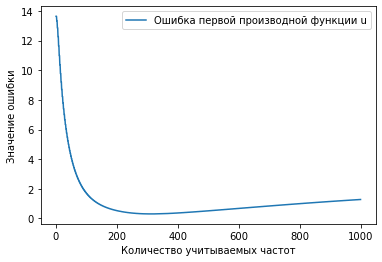

In [36]:
#Система ДУ

plt.plot(np.arange(1,1000),err_1, label = 'Ошибка первой производной функции u')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

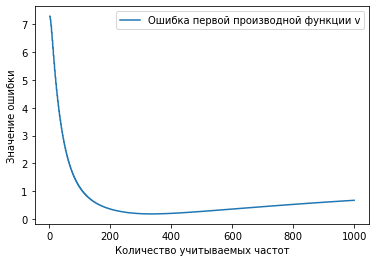

In [37]:
#Система ДУ

plt.plot(np.arange(1,1000),err_2, label = 'Ошибка первой производной функции v')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

In [7]:
np.save('system_fitness.npy',hiss)

In [25]:
dd = np.load('ode_fitness.npy', allow_pickle=True)
dd

array([array([0.00749357, 0.00749357, 0.00749357, 0.00749357, 0.00749357,
              0.00749357, 0.00749357, 0.00749357, 0.00749357, 0.00749357]),
       array([5.95107056, 0.02998954, 0.02998954, 0.02998954, 0.02998954,
              0.02998954, 5.95107056, 0.02998954, 0.02998954])           ,
       array([0.06864838, 0.06864838, 4.92953783, 0.06864838, 0.06864838,
              0.06864838, 0.06864838, 0.06864838, 5.95487251])           ,
       array([0.12445057, 0.12445057, 0.12445057, 0.12445057, 8.87360758,
              0.12445057, 0.12445057, 0.12445057, 0.12445057])           ,
       array([0.19159593, 0.19159593, 5.96533778, 0.76683961, 0.76683961,
              0.19159593, 0.19159593, 0.19159593, 0.19159593])           ,
       array([ 0.25712379,  7.96959445,  0.25712379,  0.25712379,  0.25712379,
              10.72154287])                                                   ,
       array([0.30782422, 0.30782422, 0.30782422, 0.30782422, 0.30782422,
              0.30782

In [33]:
u_fit=[]
v_fit=[]
for i in new_dd1:
    u_fit.append(i[0])
    v_fit.append(i[1])
u_fit = np.array(u_fit)
v_fit = np.array(v_fit)
v_fit

array([[0.94479652, 0.58386324, 0.87631766, 0.58386324, 0.75394078,
        0.75394078, 0.58386324],
       [0.32639946, 0.32639946, 0.32639946, 0.74961049, 0.74961049,
        0.32639946, 0.32639946],
       [0.13813298, 0.13813298, 0.90044691, 0.13813298, 0.13813298,
        0.13813298, 0.77168471],
       [0.07672701, 0.07672701, 0.77773215, 0.07672701, 0.07672701,
        0.07672701, 0.07672701],
       [0.05895549, 0.78033618, 0.05895549, 0.78033618, 0.78033618,
        0.78033618, 0.78033618],
       [0.06213797, 0.06213797, 0.7818756 , 0.06213797, 0.06213797,
        0.06213797, 0.7818756 ],
       [0.78302882, 0.07355473, 0.07355473, 0.78302882, 0.07355473,
        0.78302882, 0.78302882],
       [0.78402938, 0.08718886, 1.81558416, 0.08718886, 0.78402938,
        0.78402938, 0.78402938],
       [0.10085796, 0.78496018, 0.10085796, 0.10085796, 0.78496018,
        0.10085796, 0.10085796],
       [0.11376758, 0.11376758, 0.11376758, 1.18415709, 0.11376758,
        0.11376758, 1.1

Text(0.5, 0, 'Номер запуска')

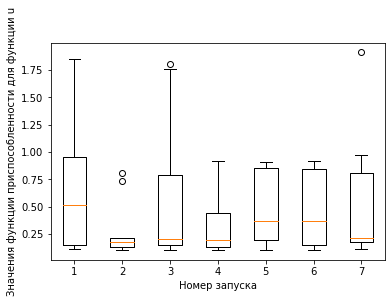

In [40]:
plt.boxplot(u_fit)
plt.ylabel("Значения функции приспособленности для функции u")
plt.xlabel('Номер запуска')
# plt.boxplot(v_fit)

Text(0.5, 0, 'Номер запуска')

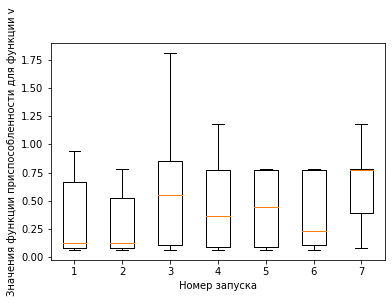

In [41]:
plt.boxplot(v_fit)
plt.ylabel("Значения функции приспособленности для функции v")
plt.xlabel('Номер запуска')

In [21]:
#ДУ с ЧП

%%time
t = np.linspace(0, 1, 101)#[:100]
x = np.linspace(0, 1, 101)#[:100]
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')#.T[:100][:,:100]
grids = np.meshgrid(t, x, indexing='ij')
hiss = []
for i in range(11,101,10):
    print(str(i)*20)
    one_stage_hiss = []
    minn = np.array([])
    for j in range(6):
        print(str(j)*30)
        epde_search_obj4 = epde_alg.epde_search(use_solver = False, dimensionality = 1, boundary = 20 ,coordinate_tensors = grids,
                                                    verbose_params = {'show_moeadd_epochs' : True})
        custom_grid_tokens = CacheStoredTokens(token_type = 'grid',
                                            token_labels = ['t', 'x'],
                                            token_tensors={'t' : grids[0], 'x' : grids[1]},
                                            params_ranges = {'power' : (1, 1)},
                                            params_equality_ranges = None)
        trig_tokens = TrigonometricTokens(dimensionality = 1)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}
        epde_search_obj4.set_moeadd_params(population_size=5, training_epochs =20)
        epde_search_obj4.set_preprocessor(default_preprocessor_type='spectral', preprocessor_kwargs={'n':i})
        epde_search_obj4.fit(data = v, max_deriv_order=(2, 2),  equation_terms_max_number = 4, equation_factors_max_number = factors_max_number,coordinate_tensors = [t,],
                                eq_sparsity_interval = (1e-8, 1e-4),additional_tokens = [custom_grid_tokens,trig_tokens,])
        epde_search_obj4.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj4.optimizer.history)
    for k in one_stage_hiss:
        print(type(fitness_value_extractor_1d(k)))
        print(fitness_value_extractor_1d(k))
        if set(fitness_value_extractor_1d(k)) == set():
            continue
        minn = np.append(minn, np.amin(fitness_value_extractor_1d(k)))
    hiss.append(minn)

1111111111111111111111111111111111111111
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000018DB283F760>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000018DB283F760>
trig_token_params : VALUES = (0, 1)
Deriv orders after definition [[None], [0], [0, 0], [1], [1, 1]]
(101, 101)
(101, 101)
derivatives orders are [0, 0, 1, 1]
initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [9.40780628e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.885768

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th e

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.


During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th w

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx1{power: 1.0} + 0.04633617717071896 * d^2u/dx1^2{power: 1.0} + 0.18995019072457348 * u{power: 1.0} + -0.6193030730041972 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.000298360564157

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000018DC27F5910>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000018DC27F5910>
trig_token_params : VALUES = (0, 1)
Deriv orders after definition [[None], [0], [0, 0], [1], [1, 1]]
(101, 101)
(101, 101)
derivatives orders are [0, 0, 1, 1]
initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [9.00905927e-05]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [4.9169285e-06]
New solution accepted, confirmed 2/5 solutions.
Creating new equa

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th ep

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Mult

During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.


During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx1{power: 1.0} + 0.0401456094614743 * d^2u/dx1^2{power: 1.0} + 0.0 * u{power: 1.0} * x{power: 1.0} + -0.0018534240982117512 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00013355802111850336}} , with objective function values of [4.76467818 2.        ] 



During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx2{power: 1.0} + 0.04165235440144479 * d^2u/dx1^2{power: 1.0} + 0.051402595283246616 * u{power: 1.0} + -0.16913572915005615 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 9.127843021436912e-05}} , with objective function values of [4.75636247 3.        ] 

0

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [4.70259884e-07]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.37398845e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [4.07419076e-08]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.08414692e-07]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [1.79577217e-08]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During M

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight

Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th wei

Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th w

During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th w

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.


During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * d^2u/dx1^2{power: 1.0} * du/dx1{power: 1.0} + 0.0 * du/dx1{power: 1.0} * t{power: 1.0} + 0.5000000000000004 * du/dx2{power: 1.0} + 0.0 = du/dx2{power: 1.0} * t{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 3.0869152915653385e-05}} , with objective function values of [5.28554555 3.        ] 

0.0 * d^2u/dx1^2{power: 1.0} * du/dx1{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 0.5000000000000004 * du/dx2{power: 1.0} + 0.0 = du/dx2{power: 1.0} * t{power: 1.0}
{'terms_number': {'optimizable': False, 'v

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


1.0455186135830163 * du/dx2{power: 1.0} * sin{power: 1.0, freq: 3.0875063845484068, dim: 0.0} + 0.0 * du/dx1{power: 1.0} * cos{power: 1.0, freq: 5.772733435543248, dim: 0.0} + 0.0 * d^2u/dx2^2{power: 1.0} * d^2u/dx1^2{power: 1.0} + 0.00034583337571306687 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00011475110374855987}} , with objective function values of [3.34307752 3.        ] 

0.9496329294486543 * du/dx2{power: 1.0} + 0.0 * u{power: 1.0} + -5.21176043236849e-05 * d^2u/dx1^2{power: 1.0} + -0.008475830072264138 = du/dx2{power: 1.0} * sin{power: 1.0, freq: 3.0875063845484068, dim: 0.0}
{'terms_num

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 18-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.040042899292417514 * d^2u/dx1^2{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 0.0 * du/dx1{power: 1.0} * x{power: 1.0} + 9.156874168910673e-05 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00016458512153709023}} , with objective function values of [13.09451167  2.        ] 

0.18162322244830517 * du/dx2{power: 1.0} * u{power: 1.0} + 0.006747929580271825 * u{power: 1.0} + 0.0 * d^2u/dx1^2{power: 1.0} * du/dx2{power: 1.0} + -0.03180601077668084 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * d^2u/dx2^2{power: 1.0} + 0.18087427750058888 * du/dx2{power: 1.0} * u{power: 1.0} + 0.0 * d^2u/dx2^2{power: 1.0} * t{power: 1.0} + -0.0018219181895022486 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 7.6702360364083e-05}} , with objective function values of [5.39626582 3.        ] 

0.0 * du/dx2{power: 1.0} + 0.040042899292417514 * d^2u/dx1^2{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 9.156874168910673e-05 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', '

During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx1{power: 1.0} + 0.18162322244830517 * du/dx2{power: 1.0} * u{power: 1.0} + 0.006747929580271825 * u{power: 1.0} + -0.03180601077668084 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0002730180727521526}} , with objective function values of [5.37270383 4.        ] 

0.18087427750058888 * du/dx2{power: 1.0} * u{power: 1.0} + 0.0 * du/dx1{power: 1.0} * du/dx2{power: 1.0} + 0.0 * du/dx2{power: 1.0} * d^2u/dx1^2{power: 1.0} + -0.0018219181895022486 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'va

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [3.11333705e-07]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [8.59124732e-07]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [1.68004306e-06]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [2.4611584e-08]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [5.16148916e-08]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [5.00424534e-07]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [4.39071262e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [8.97787817e-05]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.50031488e-08]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [8.63073042e-05]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During M

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Mult

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
D

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th 

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 15-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 16-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 17-th epoch.
During MO : processing 0-th w

During MO : processing 4-th weight.
Multiobjective optimization : 19-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.003155129988489414 * u{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 0.18021537035509788 * du/dx2{power: 1.0} * u{power: 1.0} + -0.020068460905508814 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 4.2876526867989125e-05}} , with objective function values of [5.9135622 4.       ] 

0.003155129988489414 * u{power: 1.0} + 0.0 * d^2u/dx2^2{power: 1.0} + 0.18021537035509788 * u{power: 1.0} * du/dx2{power: 1.0} + -0.020068460905508814 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'val

self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.72911841e-06]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.26614392e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [5.61736925e-05]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.29939803e-05]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [1.0322743e-07]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

Text(0.5, 0, 'Номер запуска')

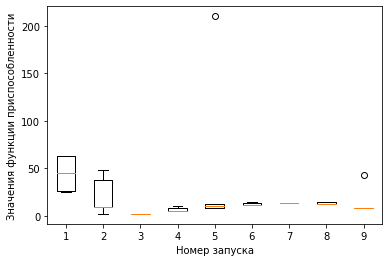

In [50]:
#ДУ с ЧП

plt.boxplot([np.array([24.88652373, 62.93149129, 62.93149129, 26.85343901]),
 np.array([ 8.6668237 ,  8.6668237 , 47.71198088,  8.6668237 ,  1.84606278,
        47.71198088]),
 np.array([2.11550387, 2.11550387, 2.11550387, 2.11550387, 2.11550387,
        2.11550387]),
 np.array([4.76467818, 4.76467818, 4.76467818, 4.76467818, 9.86771373,
        9.86771373]),
 np.array([  8.31722247,   8.31722247,   8.31722247,  11.99107221,
        210.40118267,  11.99107221]),
 np.array([11.52186035, 11.52186035, 14.39523415, 14.39523415, 11.52186035,
        11.52186035]),
 np.array([13.09451167, 13.09451167, 13.09451167, 13.09451167, 13.09451167,
        13.09451167]),
 np.array([12.07365753, 12.07365753, 12.07365753, 12.07365753, 14.83850364,
        14.83850364]),
 np.array([ 8.01305653,  8.01305653, 43.18463502,  8.01305653,  8.01305653,
         8.01305653])])
plt.ylabel("Значения функции приспособленности")
plt.xlabel('Номер запуска')

{'whiskers': [<matplotlib.lines.Line2D at 0x18dc8e22ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x18dc8e2d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x18dc8e22b50>,
 'medians': [<matplotlib.lines.Line2D at 0x18dc8e2dd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x18dc8e36130>,
 'means': []}

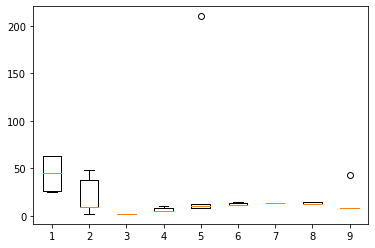

In [53]:
plt.boxplot(hiss)

In [23]:
np.save('wave_fitness.npy', hiss)

In [83]:
d1s1 = epde_search_obj4.cache[1].memory_default[('du/dx1', (1.0,))]
d1s2 = epde_search_obj4.cache[1].memory_default[('du/dx2', (1.0,))]
d2s1 = epde_search_obj4.cache[1].memory_default[('d^2u/dx1^2', (1.0,))]
d2s2 = epde_search_obj4.cache[1].memory_default[('d^2u/dx2^2', (1.0,))]
d2s2.shape

(101, 101)

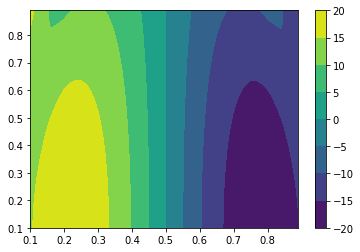

In [176]:
plt.contourf(x[10:90],t[10:90],d1s1.T[10:90][:,10:90])
plt.colorbar()

In [2]:
t = np.linspace(0, 1, 101)
x = np.linspace(0, 1, 101)
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')
dx = np.load('d_dxwaxe.npy')
dt = np.load('d_dtwave.npy')
err_1x = []
err_1t = []
for i in range(10,100):
    s_x = sd.spectral_derivative_high_ord(v, [t] , max_order = 2, n = i)[0][1]
    s_t = sd.spectral_derivative_high_ord(v.T, [t] , max_order = 2, n = i)[0][1]
    err1t = np.linalg.norm((s_t - dt)[10:90][:,10:90].flatten())
    err1x = np.linalg.norm((s_x - dx)[10:90][:,10:90].flatten())
    err_1t.append(err1t)
    err_1x.append(err1x)
err_1t
# plt.contourf(x[10:90],t[10:90],s_t.T[10:90][:,10:90])
# plt.colorbar()

OSError: [Errno 22] Invalid argument: 'wave_sln_100.csv'

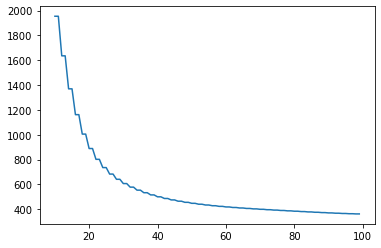

In [11]:
# plt.plot(np.arange(10,100), err_1t)
# plt.plot(np.arange(10,100), err_1x)
# plt.plot(np.arange(10,100), (np.array(err_1x)+np.array(err_1t)))

In [42]:
t = np.linspace(0, 1, 101)
x = np.linspace(0, 1, 101)
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')
dx = np.load('d_dxwaxe.npy')
dt = np.load('d_dtwave.npy') 
d2x = np.load('d2_dx2wave.npy')
d2t = np.load('d2_dt2wave.npy')
err_1x = []
err_1t = []
for i in range(10,100):
    s_x = sd.spectral_derivative_high_ord(v, [t] , max_order = 2, n = i)[1][1]
    s_t = sd.spectral_derivative_high_ord(v.T, [t] , max_order = 2, n = i)[1][1]
    err1t = np.linalg.norm((s_t - d2t)[10:90][:,10:90].flatten())
    err1x = np.linalg.norm((s_x - d2x)[10:90][:,10:90].flatten())
    err_1t.append(err1t)
    err_1x.append(err1x)
err_1t

(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)
(101, 101)

[590.8050665760841,
 590.8050665760841,
 503.6021744614486,
 503.6021744614486,
 420.1494252158321,
 420.1494252158321,
 354.47602666536966,
 354.47602666536966,
 309.52148525718087,
 309.52148525718087,
 281.94414792438846,
 281.94414792438846,
 266.31621939392585,
 266.31621939392585,
 257.85794035260136,
 257.85794035260136,
 253.35509576691862,
 253.35509576691862,
 250.95211265158952,
 250.95211265158952,
 249.66206176776416,
 249.66206176776416,
 248.97843864404965,
 248.97843864404965,
 248.64314934153103,
 248.64314934153103,
 248.5237939787159,
 248.5237939787159,
 248.55186393366793,
 248.55186393366793,
 248.6917106760565,
 248.6917106760565,
 248.92449782315228,
 248.92449782315228,
 249.23948924476255,
 249.23948924476255,
 249.62908001825588,
 249.62908001825588,
 250.08587662378358,
 250.08587662378358,
 250.60100282514625,
 250.60100282514625,
 251.16320716818248,
 251.16320716818248,
 251.75853462059513,
 251.75853462059513,
 252.3704138632772,
 252.3704138632772,
 252

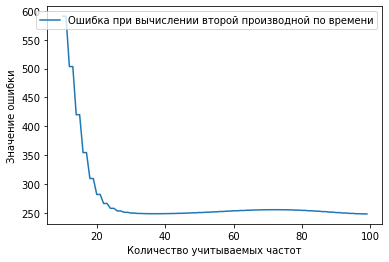

In [47]:
plt.plot(np.arange(10,100), err_1t, label = 'Ошибка при вычислении второй производной по времени')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

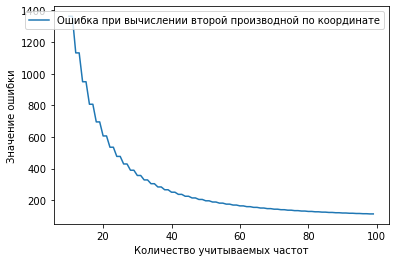

In [46]:
plt.plot(np.arange(10,100), err_1x, label = 'Ошибка при вычислении второй производной по координате')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество учитываемых частот')
plt.legend()

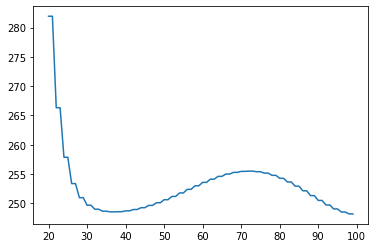

In [30]:
plt.plot(np.arange(20,100), err_1t[10:90])
# plt.plot(np.arange(10,100), np.array(err_1t)+np.array(err_1x))